In [14]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [15]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Letter\Letter_NG_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.0,4.0,4.0,3.0,2.0,7,8.0,2.0,9.0,11.0,7.0,7.0,1.0,8.0,5.0,6.0,NaN
1,4.0,7.0,5.0,5.0,5.0,5,9.0,6.0,4.0,8.0,7.0,9.0,2.0,9.0,NaN,10.0,NaN
2,7.0,10.0,8.0,7.0,4.0,8,8.0,5.0,10.0,11.0,2.0,8.0,2.0,5.0,5.0,10.0,NaN
3,4.0,9.0,5.0,7.0,4.0,7,7.0,13.0,1.0,7.0,6.0,8.0,3.0,8.0,0.0,8.0,NaN
4,6.0,7.0,8.0,5.0,4.0,7,6.0,3.0,7.0,10.0,7.0,9.0,3.0,8.0,3.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.0,10.0,5.0,8.0,3.0,4,NaN,7.0,8.0,12.0,10.0,9.0,NaN,NaN,2.0,6.0,NaN
19996,4.0,7.0,6.0,5.0,3.0,7,8.0,2.0,NaN,12.0,6.0,8.0,1.0,NaN,6.0,8.0,NaN
19997,4.0,8.0,4.0,6.0,4.0,7,8.0,7.0,4.0,10.0,7.0,6.0,3.0,9.0,3.0,7.0,NaN
19998,4.0,11.0,4.0,8.0,3.0,0,2.0,4.0,6.0,1.0,0.0,7.0,0.0,8.0,0.0,8.0,NaN


In [16]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	750
float64		column 2	1000
float64		column 3	750
float64		column 4	750
float64		column 5	1500
int64		column 6	0
float64		column 7	2000
float64		column 8	1500
float64		column 9	750
float64		column 10	500
float64		column 11	1000
float64		column 12	1250
float64		column 13	1250
float64		column 14	2000
float64		column 15	500
float64		column 16	500
float64		column 17	20000


In [17]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
count,19250.000000,19000.000000,19250.000000,19250.000000,18500.000000,20000.000000,18000.000000,18500.000000,19250.000000,19500.000000,19000.000000,18750.000000,18750.000000,18000.000000,19500.000000,19500.000000,0.0
mean,4.020364,7.036474,5.125558,5.372883,3.493892,6.897600,7.494056,4.630811,5.176571,8.280615,6.444368,7.940587,3.050667,8.328667,3.687487,7.802974,NaN
std,1.900699,3.283728,2.000591,2.237769,2.141241,2.026035,2.223864,2.642945,2.361382,2.476335,2.586136,2.052927,2.307682,1.488807,2.551802,1.601435,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,7.000000,3.000000,4.000000,7.000000,5.000000,7.000000,2.000000,8.000000,2.000000,7.000000,NaN
50%,4.000000,7.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,3.000000,8.000000,NaN
75%,5.000000,9.000000,6.000000,7.000000,5.000000,8.000000,8.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,8.000000,NaN
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,NaN


<AxesSubplot:>

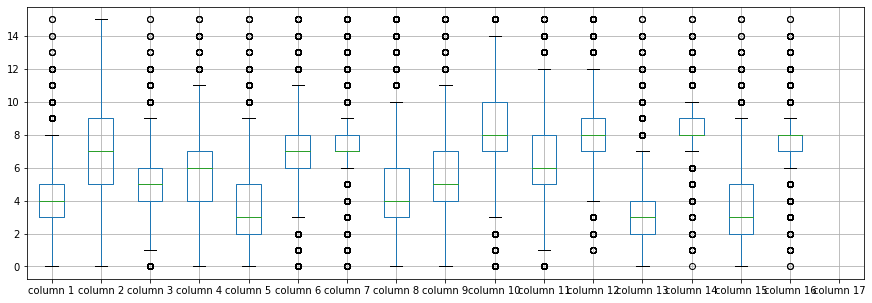

In [18]:
df.boxplot(return_type='axes', figsize=(15,5))

In [19]:
df.mean()

column 1     4.020364
column 2     7.036474
column 3     5.125558
column 4     5.372883
column 5     3.493892
column 6     6.897600
column 7     7.494056
column 8     4.630811
column 9     5.176571
column 10    8.280615
column 11    6.444368
column 12    7.940587
column 13    3.050667
column 14    8.328667
column 15    3.687487
column 16    7.802974
column 17         NaN
dtype: float64

In [20]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
column 1,1.000000,0.752315,0.848539,0.665854,0.609868,-0.033033,0.050542,0.008499,0.050776,0.145615,0.029955,-0.046429,0.481673,0.101991,0.268031,-0.101360,NaN
column 2,0.752315,1.000000,0.665753,0.820402,0.544471,0.044923,-0.030179,-0.029597,0.097357,0.159696,-0.056105,-0.005173,0.268589,0.003997,0.227623,-0.041305,NaN
column 3,0.848539,0.665753,1.000000,0.654290,0.758212,0.062011,0.027757,-0.103498,0.058292,0.115501,0.007047,-0.047054,0.547664,0.050677,0.257791,-0.113472,NaN
column 4,0.665854,0.820402,0.654290,1.000000,0.633771,0.041787,-0.019742,0.077431,0.056437,0.011272,-0.018302,0.029998,0.259206,0.031898,0.293169,-0.017399,NaN
column 5,0.609868,0.544471,0.758212,0.633771,1.000000,0.138370,-0.027744,-0.018220,-0.066238,-0.068311,-0.074433,-0.040742,0.614693,0.020083,0.483806,-0.054773,NaN
column 6,-0.033033,0.044923,0.062011,0.041787,0.138370,1.000000,-0.352056,-0.050554,-0.120960,0.085451,-0.340956,-0.033634,0.145320,-0.240417,0.126948,0.246379,NaN
column 7,0.050542,-0.030179,0.027757,-0.019742,-0.027744,-0.352056,1.000000,-0.112708,-0.049192,0.173169,0.585187,-0.257489,-0.031526,0.529376,-0.076141,-0.201534,NaN
column 8,0.008499,-0.029597,-0.103498,0.077431,-0.018220,-0.050554,-0.112708,1.000000,-0.180202,-0.312551,0.038347,0.080304,0.130021,-0.081257,0.011522,0.182620,NaN
column 9,0.050776,0.097357,0.058292,0.056437,-0.066238,-0.120960,-0.049192,-0.180202,1.000000,0.132442,-0.062799,0.119297,-0.376984,-0.052673,0.270485,-0.058521,NaN
column 10,0.145615,0.159696,0.115501,0.011272,-0.068311,0.085451,0.173169,-0.312551,0.132442,1.000000,0.052488,-0.102492,-0.173118,0.028022,-0.086205,-0.114769,NaN


In [21]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [22]:
imputer = md.Midas(layer_structure = [17,17+8,17+8+8,17+8+8+8,17+8+8,17+8,17], vae_layer = False, seed = 80)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [17]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 70.74967363586426
Epoch: 1 , loss: 47.933502603149414
Epoch: 2 , loss: 44.352059765625
Epoch: 3 , loss: 42.86048923645019
Epoch: 4 , loss: 42.02423885803223
Epoch: 5 , loss: 41.4410573135376
Epoch: 6 , loss: 40.95390892181396
Epoch: 7 , loss: 40.614627056884764
Epoch: 8 , loss: 40.182624986267086
Epoch: 9 , loss: 40.03779199371338
Epoch: 10 , loss: 39.811774822998046
Epoch: 11 , loss: 39.92897580718994
Epoch: 12 , loss: 39.51080966949463
Epoch: 13 , loss: 39.65588925933838
Epoch: 14 , loss: 39.309684101867674
Epoch: 15 , loss: 39.32850229644775
Epoch: 16 , loss: 39.210271656799314
Epoch: 17 , loss: 39.16382708435059
Epoch: 18 , loss: 39.19970280456543
Epoch: 19 , loss: 39.14660523834228
Epoch: 20 , loss: 39.020037251281735
Epoch: 21 , loss: 39.00658664855957
Epoch: 22 , loss: 38.928391079711915
Epoch: 23 , loss: 38.88089468231201
Epoch: 24 , loss: 39.034762173461914
Epoch: 25 , loss: 38.8964147064209
E

In [23]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(20000, 17)

In [24]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     3.000000
column 2     7.000000
column 3     3.000000
column 4     5.000000
column 5     2.775987
column 6     1.000000
column 7     1.000000
column 8     5.000000
column 9     5.000000
column 10    0.000000
column 11    1.000000
column 12    6.000000
column 13    0.000000
column 14    8.000000
column 15    0.000000
column 16    8.000000
column 17    0.004853
Name: 21, dtype: float64

In [25]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Letter.xlsx', header=None,names=column_names)

In [26]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,0.0,0.000000,0.0,0.0,0.0,0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,NaN
1,0.0,0.000000,0.0,0.0,0.0,0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,-2.797352,0.0,NaN
2,0.0,0.000000,0.0,0.0,0.0,0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,NaN
3,0.0,0.000000,0.0,0.0,0.0,0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,NaN
4,0.0,0.000000,0.0,0.0,0.0,0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.000000,0.0,0.0,0.0,0,-2.409415,0.0,0.000000,0.0,0.0,0.000000,1.073154,-0.541080,0.000000,0.0,NaN
19996,0.0,0.000000,0.0,0.0,0.0,0,0.000000,0.0,-6.230098,0.0,0.0,0.000000,0.000000,-3.018897,0.000000,0.0,NaN
19997,0.0,0.000000,0.0,0.0,0.0,0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,NaN
19998,0.0,0.000000,0.0,0.0,0.0,0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,NaN


Calculating NRMSE Value

In [27]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [28]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [29]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

389.9917552632151

In [30]:
denominator=Frobenius_norm(complete_df)
denominator

3733.8164121981144

In [31]:
NRMS=numerator/denominator
NRMS


0.10444856206350682

In [32]:
new_df.iloc[66,:]

column 1      6.000000
column 2      9.000000
column 3     10.000000
column 4      7.000000
column 5     11.000000
column 6     10.000000
column 7      5.000000
column 8      3.000000
column 9      2.000000
column 10     9.000000
column 11     4.000000
column 12     8.000000
column 13    11.000000
column 14     9.820377
column 15     4.000000
column 16     7.000000
column 17     0.001969
Name: 66, dtype: float64

In [33]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,2.0,4.000000,4.0,3.0,2.0,7,8.000000,2.0,9.000000,11.0,7.0,7.000000,1.000000,8.000000,5.000000,6.0,0.001534
1,4.0,7.000000,5.0,5.0,5.0,5,9.000000,6.0,4.000000,8.0,7.0,9.000000,2.000000,9.000000,4.202648,10.0,-0.002523
2,7.0,10.000000,8.0,7.0,4.0,8,8.000000,5.0,10.000000,11.0,2.0,8.000000,2.000000,5.000000,5.000000,10.0,-0.000515
3,4.0,9.000000,5.0,7.0,4.0,7,7.000000,13.0,1.000000,7.0,6.0,8.000000,3.000000,8.000000,0.000000,8.0,0.001362
4,6.0,7.000000,8.0,5.0,4.0,7,6.000000,3.0,7.000000,10.0,7.0,9.000000,3.000000,8.000000,3.000000,7.0,-0.000518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5.0,10.000000,5.0,8.0,3.0,4,7.590585,7.0,8.000000,12.0,10.0,9.000000,3.073154,8.458920,2.000000,6.0,-0.002169
19996,4.0,7.000000,6.0,5.0,3.0,7,8.000000,2.0,3.769902,12.0,6.0,8.000000,1.000000,5.981103,6.000000,8.0,0.003911
19997,4.0,8.000000,4.0,6.0,4.0,7,8.000000,7.0,4.000000,10.0,7.0,6.000000,3.000000,9.000000,3.000000,7.0,0.003417
19998,4.0,11.000000,4.0,8.0,3.0,0,2.000000,4.0,6.000000,1.0,0.0,7.000000,0.000000,8.000000,0.000000,8.0,0.001517


In [34]:
imputations[-1].to_excel("Letter_NG_1(imp).xlsx", index=False, header=False)